# Quantum Fourier Transform
## Team Quantum Dudes

- Stefan Balle
- Simon Jaxy
- Joshua Schwarz
- Peter Naeve
- Davide Valenti
- Junbo Huang

## Overview

we use Controlled Phase Rotation gate CU1 to perform the QFT, which performs a phase rotation if both qubits are in the $|11\rangle$ state. The matrix looks the same regardless of whether the MSB or LSB is the control qubit.

$$
C_{u1}(\lambda) = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & e^{i\lambda}
\end{pmatrix}
$$



## Code

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math
from math import pi

In [2]:
from qiskit import execute, Aer, IBMQ
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import available_backends, execute, register, get_backend
from qiskit.tools.visualization import circuit_drawer
from qiskit.tools.qi.qi import state_fidelity
from qiskit.wrapper.jupyter import *
from qiskit.backends.ibmq import least_busy

# import state tomography functions
from qiskit.tools.visualization import plot_histogram, plot_state

### design a muscular quantum circuit

WARNING Unable to complile latex. The output from the pdflatex command can be found in latex_error.log


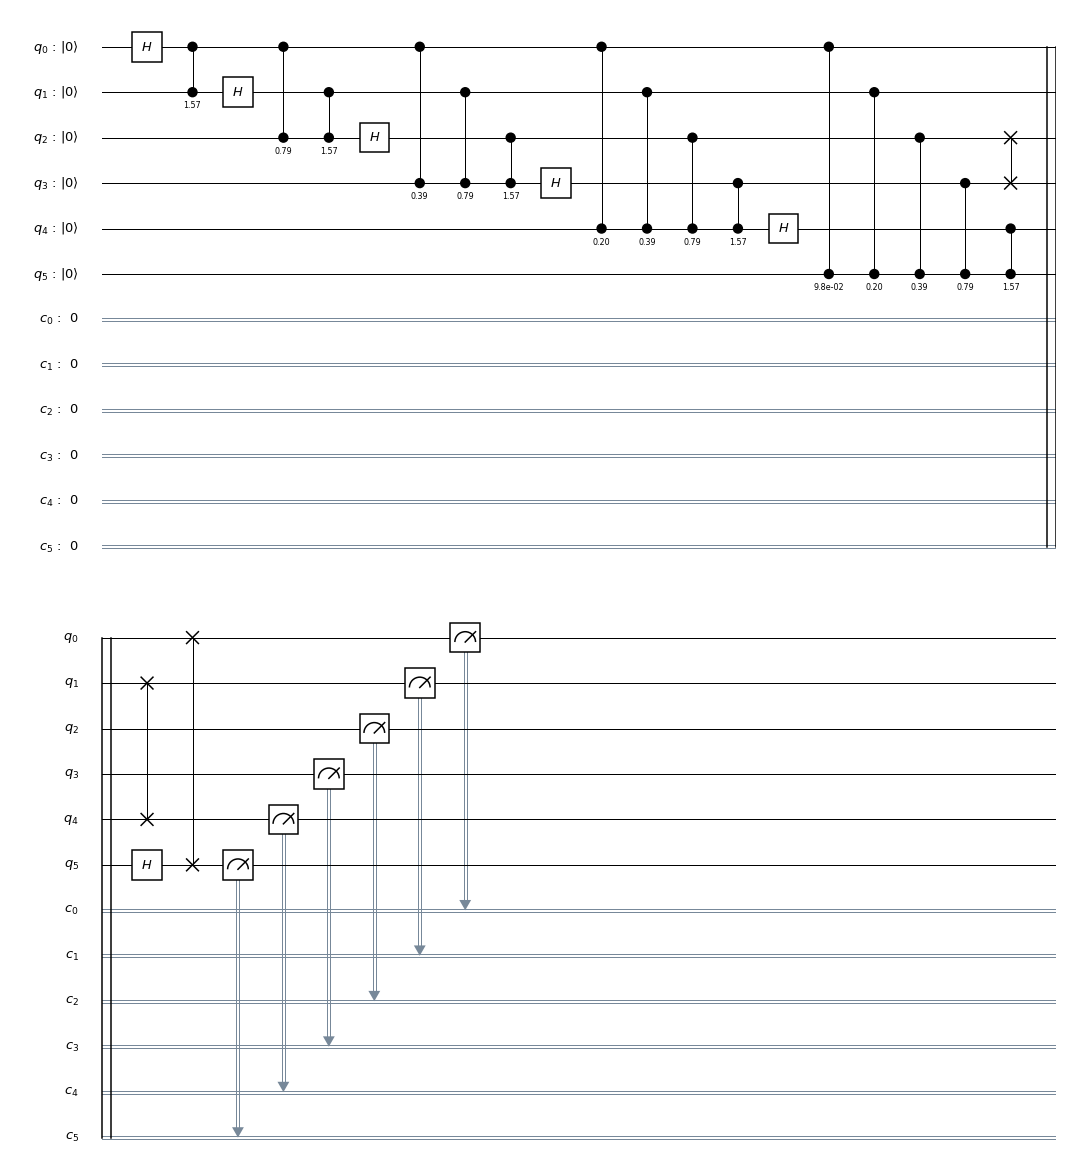

In [118]:
# number of qubits 
n = 6
# one quantum register with n qubits
q = QuantumRegister(n, 'q')  
# one classical register with n classical bits for measurement
c = ClassicalRegister(n, "c")  
# build a circuit 
qc = QuantumCircuit(q, c)  

## optional: try different gates before the controlled phase gate
# qc.y(q[0])
# qc.y(q[1]) 
# qc.y(q[2]) 
# qc.y(q[3]) 
# qc.y(q[4])
# qc.y(q[5])
qc.barrier()

## add Hadamard gate to every qubit
for i in range(n):
    qc.h(q[i])
    ## entangle i-th qubit with [i+1, n]-th qubit with controlled-phase gate cu1
    for j in range(i+1, n):
        qc.cu1((2*pi)/(2**(2+j-i-1)),q[i], q[j])
        
## swap gate
for i in range(n):
    if i <= (n/2) - 1:
        qc.swap(q[i], q[n-1-i])
qc.barrier()

## measure
qc.measure(q, c)
    
circuit_drawer(qc)

## result 
### Simulator

In [92]:
sim_backend = Aer.get_backend('qasm_simulator')
job = execute(qc, sim_backend, shots=8192)
result = job.result()
print(result)
print(result.get_counts())

COMPLETED
{'000000': 131, '000001': 142, '000010': 127, '000011': 127, '000100': 128, '000101': 154, '000110': 129, '000111': 117, '001000': 108, '001001': 119, '001010': 135, '001011': 131, '001100': 131, '001101': 138, '001110': 141, '001111': 119, '010000': 128, '010001': 122, '010010': 131, '010011': 141, '010100': 134, '010101': 143, '010110': 123, '010111': 129, '011000': 118, '011001': 136, '011010': 127, '011011': 130, '011100': 135, '011101': 123, '011110': 108, '011111': 132, '100000': 133, '100001': 133, '100010': 149, '100011': 126, '100100': 123, '100101': 128, '100110': 134, '100111': 116, '101000': 132, '101001': 122, '101010': 120, '101011': 135, '101100': 140, '101101': 111, '101110': 125, '101111': 119, '110000': 124, '110001': 118, '110010': 140, '110011': 137, '110100': 134, '110101': 128, '110110': 136, '110111': 125, '111000': 114, '111001': 125, '111010': 137, '111011': 141, '111100': 117, '111101': 98, '111110': 114, '111111': 121}


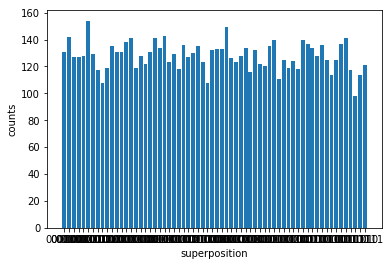

In [93]:
y = list(result.get_counts().values())
x = list(result.get_counts().keys())
plt.bar(x, y)
plt.ylabel("counts")
plt.xlabel("superposition")
plt.savefig("histogram.png")

### Real machine

In [28]:
# IBMQ.save_account('2fb02d01543906dd70dafc92e508bfed240078601997a5c16790515ab9dc960eb885cb8cc3125ac06659841617319ec191b74d4dd9640551252b69c94f4b0ef3')
IBMQ.load_accounts()
print("Available backends:")
IBMQ.backends()

/Users/junbohuang/anaconda/envs/python3/lib/python3.6/site-packages/qiskit/backends/ibmq/ibmqprovider.py:258: UserWarning: Credentials are already in use.
  warnings.warn('Credentials are already in use.')


Available backends:


[<IBMQBackend('ibmqx4') from IBMQ()>,
 <IBMQBackend('ibmqx5') from IBMQ()>,
 <IBMQBackend('ibmqx2') from IBMQ()>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ()>,
 <IBMQBackend('ibmq_qasm_simulator') from IBMQ()>]

In [29]:
large_enough_devices = IBMQ.backends(filters=lambda x: x.configuration()['n_qubits'] > 3 and
                                                       not x.configuration()['simulator'])
backend = least_busy(large_enough_devices)
print("The best backend is " + backend.name())
shots = 8192          # Number of shots to run the program (experiment); maximum is 8192 shots.
max_credits = 3        # Maximum number of credits to spend on executions. 

The best backend is ibmq_16_melbourne


In [127]:
job_exp = execute(qc, backend=backend, shots=shots, max_credits=max_credits)
jobID = job_exp.job_id()

In [135]:
job_exp.status()

<JobStatus.DONE: 'job has successfully run'>

### 10 qubits

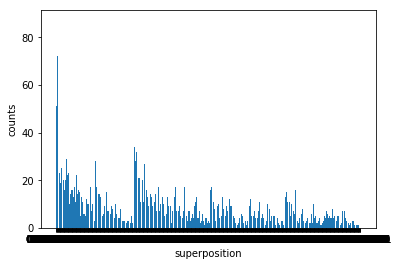

In [124]:
result_real = job_exp.result()
y_real = list(result_real.get_counts().values())
x_real = list(result_real.get_counts().keys())
plt.bar(x_real, y_real)
plt.ylabel("counts")
plt.xlabel("superposition")
plt.savefig("real_10qubit.png")

### 6 qubits

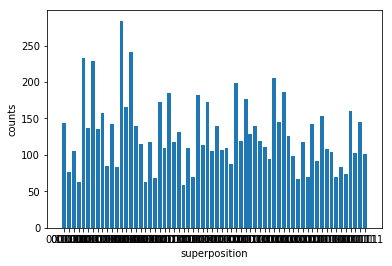

In [136]:
result_real = job_exp.result()
y_real = list(result_real.get_counts().values())
x_real = list(result_real.get_counts().keys())
plt.bar(x_real, y_real)
plt.ylabel("counts")
plt.xlabel("superposition")
plt.savefig("real.png")

## Conclusion

1. the more qubits, the more error, the less uniform.
2. simulator is always good, always uniformly distributed, because it is simulator...
3. real machine is always not really uniformly distributed, because it is a real shit...
4. adding x,y,z gates before hadamard gates doesnt significantly change the distrribution visually.